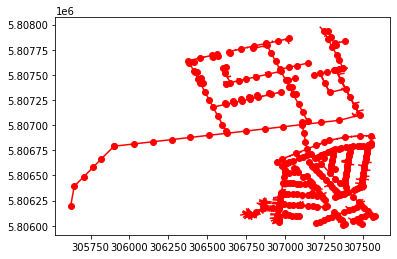

In [1]:
import json

import matplotlib.pyplot as plt

TEST_DATA = json.load(open("../tests/test_data/trace/test_data.json", "r"))

for a, f in TEST_DATA.items():
    for feature in f:
        if feature["geometry"]["type"] == "LineString":
            x, y = zip(*feature["geometry"]["coordinates"])
            plt.plot(x, y, "r-")
        elif feature["geometry"]["type"] == "Point":
            x, y = (
                feature["geometry"]["coordinates"][0],
                feature["geometry"]["coordinates"][1],
            )
            plt.plot(x, y, "ro")

        node_ref = feature.get("NODE_REF", "")
        if node_ref == "ALT1P" or node_ref.startswith("ERS"):
            pass
            # TODO: add label to outfall node

# TODO: hide axis ticks, labels
plt.show()

In [2]:
import gww_gis_tools.trace_gis.trace_sewer as TS

In [3]:
g = TS.Graph(TS.DIRECTION.U).from_dicts(
    [
        {k: f[k] for k in ["START_NODE", "END_NODE", "PIPE_ID"]}
        for f in TEST_DATA["pipes"]
    ]
)

tr = TS.Trace(g).trace("38264_CWW")  # ALT1P

print(len(tr.pipes), len(tr.nodes))

print(len(TEST_DATA["pipes"]), len(TEST_DATA["nodes"]))

325 326
326 327


In [4]:
in_tr = lambda x: not (x.get("PIPE_ID") in tr.pipes or x.get("NODE_ID") in tr.nodes)

for f in filter(in_tr, TEST_DATA["nodes"]):
    print(f)

for f in filter(in_tr, TEST_DATA["pipes"]):
    print(f)

{'index': 87956, 'ASSET_OWNER': 'CWW', 'COMMENTS': '', 'GID': '1713942006_CWW', 'NODE_COVELEV': 2.53, 'NODE_DEPTH': 1.5, 'NODE_ID': '184673_CWW', 'NODE_REF': 'ERS212', 'NODE_TYPE': 'AP_ERSPITMANHOLE', 'SYM_ANGLE': 2.1991148575128596, 'SYM_NAME': '_SNAERSPITMHOLE_RECT', 'SYM_SCALE': 1.0, 'geometry': {'type': 'Point', 'coordinates': [305898.71, 5806789.41]}}
{'index': 87009, 'ASSET_OWNER': 'CWW', 'COMMENTS': 'Pipe Material Updated 20/6/2014 - GNA', 'END_COVELEV': 2.53, 'END_INVELEV': 1.03, 'END_NODE': '184673_CWW', 'GEOM_LENGTH': 2.18421545883755, 'GID': '1713942007_CWW', 'PIPE_DIA': 750, 'PIPE_ID': '157762_CWW', 'PIPE_MATRL': 'CONC', 'PIPE_TYPE': 'RETICULATION', 'SRC_TABLE': 'GPIPE', 'START_COVELEV': 2.53, 'START_INVELEV': 0.9, 'START_NODE': '38439_CWW', 'geometry': {'type': 'LineString', 'coordinates': [[305900.66, 5806790.37], [305898.71, 5806789.41]]}}


In [5]:
tr = TS.Trace(g).trace("4789_CWW")
in_tr = lambda x: not (x.get("PIPE_ID") in tr.pipes or x.get("NODE_ID") in tr.nodes)

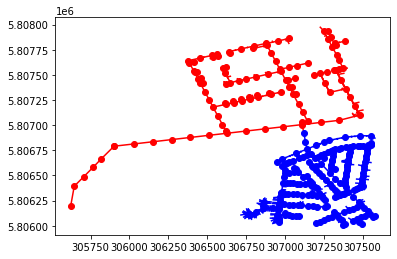

In [6]:
TEST_DATA = json.load(open("../tests/test_data/trace/test_data.json", "r"))

for a, f in TEST_DATA.items():
    for feature in f:
        c = "r" if in_tr(feature) else "b"

        if feature["geometry"]["type"] == "LineString":
            x, y = zip(*feature["geometry"]["coordinates"])
            plt.plot(x, y, f"{c}-")
        elif feature["geometry"]["type"] == "Point":
            x, y = (
                feature["geometry"]["coordinates"][0],
                feature["geometry"]["coordinates"][1],
            )
            plt.plot(x, y, f"{c}o")

        node_ref = feature.get("NODE_REF", "")
        if node_ref == "ALT1P" or node_ref.startswith("ERS"):
            pass
            # TODO: add label to outfall node

# TODO: hide axis ticks, labels
plt.show()